In [56]:
import pandas as pd
import numpy as np
from scipy import stats
from math import sqrt
from collections import defaultdict
import matplotlib.pyplot as plt

## (a) Load Iris dataset into pandas dataframe

In [11]:
df = pd.read_csv('Iris.csv')

## (b) Calculate mean, standard deviation, minimum and maximum values for each quantitative attribute

In [12]:
def scale(column, min, max):
    diff_sum = 0
    i = 0
    for row in df[column]:
        df.loc[i, "col"] = (row - min) / (max - min)
        i += 1

In [13]:
def stddev(column, mean):
    diff_sum_squared = 0
    for row in df[column]:
        diff_sum_squared += (row - mean) ** 2
    return sqrt(diff_sum_squared / (len(df[column]) - 1))

In [46]:
counter = 0 
for column in df:
    if counter == 0:
        counter += 1
        continue
    if counter == 5:
        break
    counter += 1
    sum = 0.0
    min = 1e9
    max = -1e9
    flag = 0

    for row in df[column]:
        sum += row
        if min > row:
            min = row
        if max < row:
            max = row
    print(f"For {column}")
    mean = sum / len(df[column])
    print(f"\tMean : {mean}")
    print(f"\tMaximum : {max}")
    print(f"\tMinimum : {min}")
    print(f"\tStandard Deviation : {stddev(column, mean)}")
    # scale(column, min, max)


For SepalLengthCm
	Mean : 5.843333333333335
	Maximum : 7.9
	Minimum : 4.3
	Standard Deviation : 0.8280661279778629
For SepalWidthCm
	Mean : 3.0540000000000007
	Maximum : 4.4
	Minimum : 2.0
	Standard Deviation : 0.4335943113621737
For PetalLengthCm
	Mean : 3.7586666666666693
	Maximum : 6.9
	Minimum : 1.0
	Standard Deviation : 1.7644204199522617
For PetalWidthCm
	Mean : 1.1986666666666672
	Maximum : 2.5
	Minimum : 0.1
	Standard Deviation : 0.7631607417008414


## (c) Count the frequency of each distinct value in the qualitative attribute 'class' in the Iris dataset.

In [ ]:
def qualitative_frequency(column_name):
    freq_dict = defaultdict(int)
    for row in df[column_name]:
        freq_dict[row] += 1
    return freq_dict

print(qualitative_frequency("Species"))

defaultdict(<class 'int'>, {'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50})


## (d) Display a summary of all attributes, including quantitative and qualitative in the Iris dataset using a table

In [35]:
df.describe(include = "all")

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


## (e) Compute the covariance and correlation between pairs of attributes in the dataset

In [ ]:
column_list = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
for column1 in column_list:
    for column2 in column_list:
        cov = df[column1].cov(df[column2])
        print(f"Covariance between {column1} and {column2} is: {cov}")

Covariance between SepalLengthCm and SepalLengthCm is: 0.6856935123042504
Covariance between SepalLengthCm and SepalWidthCm is: -0.03926845637583893
Covariance between SepalLengthCm and PetalLengthCm is: 1.2736823266219246
Covariance between SepalLengthCm and PetalWidthCm is: 0.5169038031319911
Covariance between SepalWidthCm and SepalLengthCm is: -0.03926845637583893
Covariance between SepalWidthCm and SepalWidthCm is: 0.18800402684563766
Covariance between SepalWidthCm and PetalLengthCm is: -0.32171275167785235
Covariance between SepalWidthCm and PetalWidthCm is: -0.11798120805369115
Covariance between PetalLengthCm and SepalLengthCm is: 1.2736823266219246
Covariance between PetalLengthCm and SepalWidthCm is: -0.32171275167785235
Covariance between PetalLengthCm and PetalLengthCm is: 3.1131794183445187
Covariance between PetalLengthCm and PetalWidthCm is: 1.2963874720357944
Covariance between PetalWidthCm and SepalLengthCm is: 0.5169038031319911
Covariance between PetalWidthCm and Se

## (f) Display a histogram for the 'sepal length' attribute in the Iris dataset

Text(0.5, 0, 'Values')

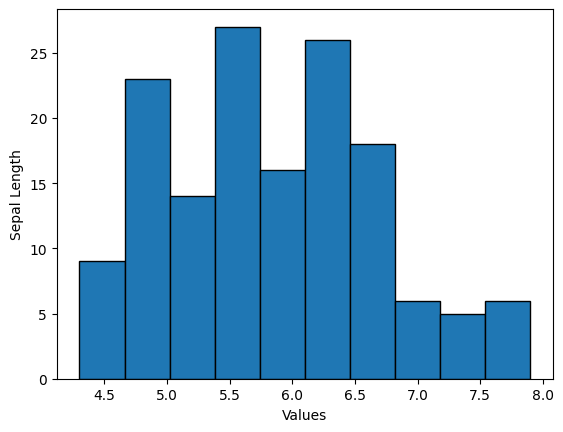

In [63]:
plt.hist(df["SepalLengthCm"], edgecolor = "black")
plt.ylabel("Sepal Length")
plt.xlabel("Values")

## (g) Create a boxplot to show the distribution of values for each attribute in the Iris dataset.

## (h) Create scatter plots to visualize the joint distribution of each pair of attributes in the Iris dataset

## (i) Use parallel coordinates to display all the data points simultaneously in the Iris dataset.